**Data preprocessing** is the first step in any data analysis or machine learning pipeline. It involves cleaning, transforming and organizing raw data to ensure it is accurate, consistent and ready for modeling. It has a big impact on model building such as:

--Clean and well-structured data allows models to learn meaningful patterns rather than noise.       
--Properly processed data prevents misleading inputs, leading to more reliable predictions.          
--Organized data makes it simpler to create useful inputs for the model, enhancing model performance.                                
--Organized data supports better Exploratory Data Analysis (EDA), making patterns and trends more interpretable.




**Data cleaning:**
Data cleaning is the process of identifying and correcting errors or inconsistencies in the data to ensure it is accurate and complete. The objective is to address issues that can distort analysis or model performance.

**For example:**

**Handling missing values:** Using strategies like mean/mode imputation, deletion, or predictive models to fill in or remove missing data.    
**Removing duplicates:** Eliminating duplicate records to ensure each entry is unique and relevant.    
**Correcting inconsistent formats:** Standardizing formats (e.g., date formats, string cases) to maintain consistency.

In [ ]:
import pandas as pd

# Load the Titanic dataset from a public URL
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first 5 rows of the DataFrame
display(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [ ]:
# Check for missing values in each column
missing_values = titanic_df.isnull().sum()
display(missing_values)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


*   PassengerId: A unique identifier assigned to each passenger.
*   Survived: Indicates whether the passenger survived the disaster (0 = No, 1 = Yes).
*   Pclass: The passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd).
*  Name: The passenger's name.
*   Sex: The passenger's gender (male or female).
*   Age: The passenger's age in years.

*   SibSp: Number of siblings or spouses aboard the Titanic with the passenger.
*  Parch:  Number of parents or children aboard the Titanic with the passenger.
*  Ticket: The ticket number.
*  Fare: The fare paid by the passenger.
*   Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton).
*  Cabin: This column contained the cabin number(s) assigned to the passenger. For example, 'C85', 'F33',












In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handling Missing Values in 'Age'

For the 'Age' column, we will impute missing values with the median age. The median is often preferred over the mean for imputation when the data might contain outliers, as it is more robust.

In [ ]:
# Impute missing 'Age' values with the median
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

print(f"Missing 'Age' values after imputation: {titanic_df['Age'].isnull().sum()}")

Missing 'Age' values after imputation: 0


/tmp/ipython-input-3553601465.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)


### Handling Missing Values in 'Cabin'

The 'Cabin' column has a significant number of missing values. Instead of trying to impute, which could be complex and unreliable given the extent of missingness, we will create a new binary feature `Has_Cabin` (1 if Cabin is known, 0 otherwise) and then drop the original 'Cabin' column.

In [ ]:
# Create a new feature 'Has_Cabin' indicating if a cabin value was present
titanic_df['Has_Cabin'] = titanic_df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop the original 'Cabin' column
titanic_df.drop('Cabin', axis=1, inplace=True)

print("DataFrame after handling 'Cabin' column:")
display(titanic_df.head())
print(f"Missing 'Cabin' values after dropping: {titanic_df['Has_Cabin'].isnull().sum()}")

DataFrame after handling 'Cabin' column:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


Missing 'Cabin' values after dropping: 0


### Handling Missing Values in 'Embarked'

For the 'Embarked' column, there are only a couple of missing values. We will fill these with the most frequent embarkation port (the mode).

In [ ]:
# Impute missing 'Embarked' values with the mode
most_frequent_embarkation = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_frequent_embarkation, inplace=True)

print(f"Missing 'Embarked' values after imputation: {titanic_df['Embarked'].isnull().sum()}")

Missing 'Embarked' values after imputation: 0


/tmp/ipython-input-1870612250.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(most_frequent_embarkation, inplace=True)


### Verifying all missing values are handled

In [ ]:
# Check for missing values again after all imputation steps
missing_values_after_handling = titanic_df.isnull().sum()
display(missing_values_after_handling)

# Display DataFrame info to confirm data types and non-null counts
display(titanic_df.info())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


None

**Data integration**                   
Data integration involves combining data from multiple sources to create a unified dataset. This is often necessary when data is collected from different source systems.

Some techniques used in data integration include:

**Schema matching:** Aligning fields and data structures from different sources to ensure consistency.  
**Data deduplication:** Identifying and removing duplicate entries across multiple datasets.

**Data transformation**  
Data transformation converts data into formats suitable for analysis, machine learning, or mining.

**For example:**

**Scaling and normalization:** Adjusting
numeric values to a common scale is often necessary for algorithms that rely on distance metrics.         
**Encoding categorical variables:** Converting categorical data into numerical values using one-hot or label encoding techniques.  
**Feature engineering and extraction:** Creating new features or selecting important ones to improve model performance.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x600 with 0 Axes>

### Encoding Categorical Variables

We need to convert categorical features like 'Sex' and 'Embarked' into numerical representations for most machine learning algorithms. We will use One-Hot Encoding for these columns, which creates new binary columns for each category.

In [ ]:
# One-Hot Encode 'Sex' column
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)

# One-Hot Encode 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

print("DataFrame after One-Hot Encoding 'Sex' and 'Embarked':")
display(titanic_df.head())

DataFrame after One-Hot Encoding 'Sex' and 'Embarked':


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,True,False,True


### Feature Engineering: Creating 'FamilySize' and 'IsAlone'

We can create more insightful features from existing ones. Let's create `FamilySize` by combining `SibSp` and `Parch`, and then `IsAlone` based on `FamilySize`.

In [ ]:
# Create 'FamilySize' feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 # +1 for the passenger themselves

# Create 'IsAlone' feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

print("DataFrame after adding 'FamilySize' and 'IsAlone' features:")
display(titanic_df.head())

DataFrame after adding 'FamilySize' and 'IsAlone' features:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,True,False,True,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,False,False,False,2,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,False,False,True,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,False,False,True,2,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,True,False,True,1,1


### Dropping unnecessary columns

Columns like 'Name', 'Ticket', 'SibSp', and 'Parch' might not be directly useful for modeling after feature engineering, or they might be too complex to use directly without further processing. Let's drop them to simplify the dataset.

In [ ]:
# Drop original 'SibSp' and 'Parch' columns after creating 'FamilySize'
titanic_df.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

print("DataFrame after dropping unnecessary columns:")
display(titanic_df.head())
display(titanic_df.info())

DataFrame after dropping unnecessary columns:


,PassengerId,Survived,Pclass,Age,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,22.0,7.2500,0,True,False,True,2,0
1,2,1,1,38.0,71.2833,1,False,False,False,2,0
2,3,1,3,26.0,7.9250,0,False,False,True,1,1
3,4,1,1,35.0,53.1000,1,False,False,True,2,0
4,5,0,3,35.0,8.0500,0,True,False,True,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Has_Cabin    891 non-null    int64  
 6   Sex_male     891 non-null    bool   
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int64  
dtypes: bool(3), float64(2), int64(6)
memory usage: 58.4 KB


None

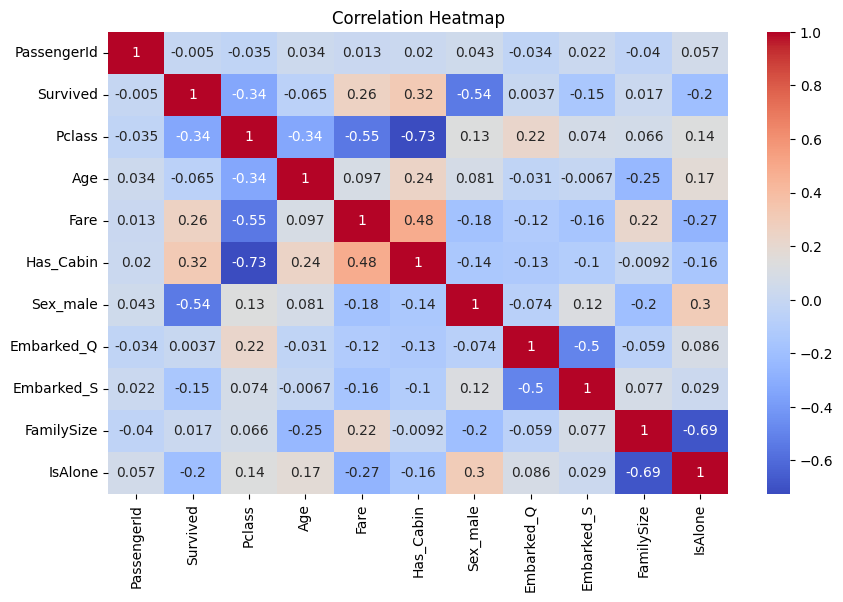

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Reloading the Original Dataset

To demonstrate `sklearn` methods from a clean slate, let's reload the original Titanic dataset.

In [ ]:
import pandas as pd

# Reload the Titanic dataset from a public URL
titanic_df_sklearn = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("Original DataFrame info after reload:")
display(titanic_df_sklearn.info())
print("Missing values after reload:")
display(titanic_df_sklearn.isnull().sum())

Original DataFrame info after reload:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Missing values after reload:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Handling Missing Values with `sklearn.impute.SimpleImputer`

We will use `SimpleImputer` for 'Age' (median strategy) and 'Embarked' (most frequent strategy).

In [ ]:
from sklearn.impute import SimpleImputer

# Impute 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
titanic_df_sklearn['Age'] = age_imputer.fit_transform(titanic_df_sklearn[['Age']])

# Impute 'Embarked' with the most frequent value
# Note: SimpleImputer outputs a numpy array, so we need to convert back to Series/DataFrame
embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_df_sklearn['Embarked'] = embarked_imputer.fit_transform(titanic_df_sklearn[['Embarked']]).ravel() # Use .ravel() to flatten the 2D array

print("DataFrame info after imputation with SimpleImputer:")
display(titanic_df_sklearn.info())
print("Missing values after SimpleImputer:")
display(titanic_df_sklearn.isnull().sum())

DataFrame info after imputation with SimpleImputer:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

Missing values after SimpleImputer:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Handling 'Cabin' (Creating 'Has_Cabin' and Dropping Original)

This step remains the same as it's a custom feature engineering task not directly covered by a single `sklearn` transformer.

In [ ]:
# Create a new feature 'Has_Cabin' indicating if a cabin value was present
titanic_df_sklearn['Has_Cabin'] = titanic_df_sklearn['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop the original 'Cabin' column
titanic_df_sklearn.drop('Cabin', axis=1, inplace=True)

print("DataFrame after handling 'Cabin' column:")
display(titanic_df_sklearn.head())

DataFrame after handling 'Cabin' column:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


### One-Hot Encoding with `sklearn.preprocessing.OneHotEncoder`

Now we'll use `OneHotEncoder` for 'Sex' and 'Embarked'.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['Sex', 'Embarked']
encoder=OneHotEncoder(drop='first')
encoded_features= encoder.fit_transform(titanic_df_sklearn[categorical_features])
encoded_df=pd.DataFrame(encoded_features.toarray(),columns=encoder.get_feature_names_out(categorical_features))
#print(encoded_df)
titanic_df_sklearn_encoded=pd.concat([titanic_df_sklearn,encoded_df],axis=1)
titanic_df_sklearn_encoded.drop(categorical_features,axis=1,inplace=True)
titanic_df_sklearn_encoded.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1.0,0.0,1.0


### Feature Engineering: Creating 'FamilySize' and 'IsAlone' (Re-apply)

These steps are custom and are generally done with pandas.

In [ ]:
# Create 'FamilySize' feature
titanic_df_sklearn_encoded['FamilySize'] = titanic_df_sklearn_encoded['SibSp'] + titanic_df_sklearn_encoded['Parch'] + 1 # +1 for the passenger themselves

# Create 'IsAlone' feature
titanic_df_sklearn_encoded['IsAlone'] = 0
titanic_df_sklearn_encoded.loc[titanic_df_sklearn_encoded['FamilySize'] == 1, 'IsAlone'] = 1

print("DataFrame after adding 'FamilySize' and 'IsAlone' features:")
display(titanic_df_sklearn_encoded.head())

DataFrame after adding 'FamilySize' and 'IsAlone' features:


,Sex_male,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,FamilySize,IsAlone
0,1.0,0.0,1.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,0,2,0
1,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,2,0
2,0.0,0.0,1.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,0,1,1
3,0.0,0.0,1.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1,1,2,0
4,1.0,0.0,1.0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.05,0,1,1


### Dropping unnecessary columns (Re-apply)

Columns like 'Name', 'Ticket', 'SibSp', and 'Parch' are still not needed after feature engineering.

In [ ]:
# Drop original 'SibSp' and 'Parch' columns after creating 'FamilySize', and 'Name', 'Ticket'
titanic_df_sklearn_encoded.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

print("Final DataFrame after dropping unnecessary columns:")
display(titanic_df_sklearn_encoded.head())
display(titanic_df_sklearn_encoded.info())

Final DataFrame after dropping unnecessary columns:


,Sex_male,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,Fare,Has_Cabin,FamilySize,IsAlone
0,1.0,0.0,1.0,1,0,3,22.0,7.25,0,2,0
1,0.0,0.0,0.0,2,1,1,38.0,71.2833,1,2,0
2,0.0,0.0,1.0,3,1,3,26.0,7.925,0,1,1
3,0.0,0.0,1.0,4,1,1,35.0,53.1,1,2,0
4,1.0,0.0,1.0,5,0,3,35.0,8.05,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sex_male     891 non-null    object
 1   Embarked_Q   891 non-null    object
 2   Embarked_S   891 non-null    object
 3   PassengerId  891 non-null    object
 4   Survived     891 non-null    object
 5   Pclass       891 non-null    object
 6   Age          891 non-null    object
 7   Fare         891 non-null    object
 8   Has_Cabin    891 non-null    object
 9   FamilySize   891 non-null    object
 10  IsAlone      891 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 76.7+ KB


None

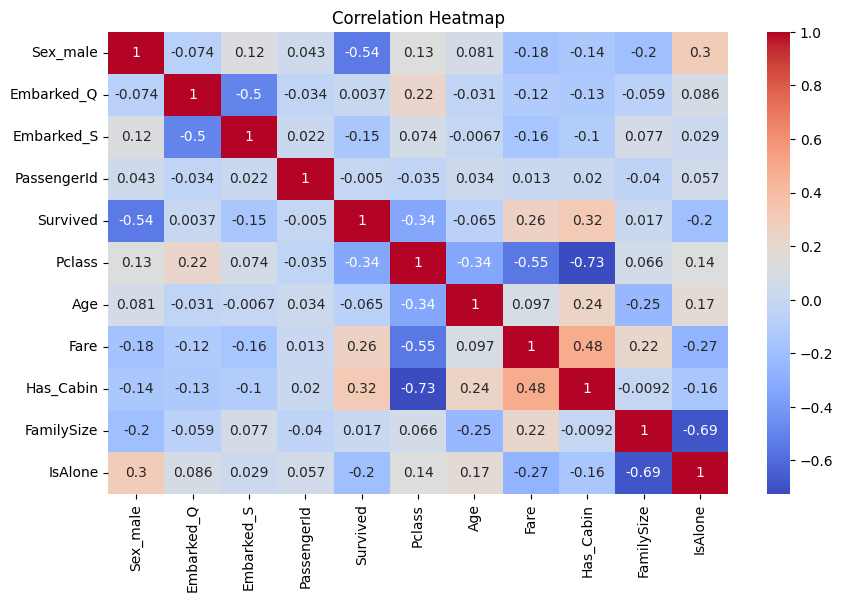

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df_sklearn_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

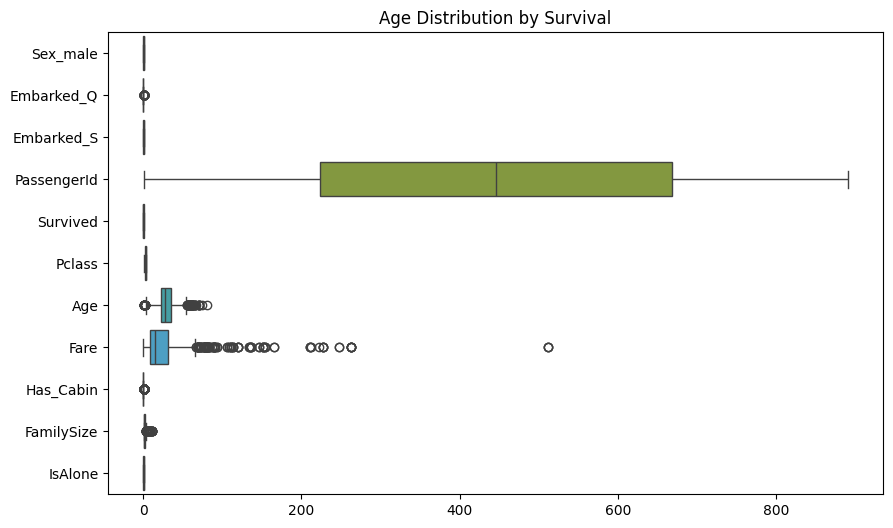

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(titanic_df_sklearn_encoded, orient='h')
plt.title('Age Distribution by Survival')
plt.show()

**Data reduction** simplifies the dataset by reducing the number of features or records while preserving the essential information. This helps speed up analysis and model training without sacrificing accuracy.

Techniques for data reduction include:

**Feature selection:** Choosing the most important features contributing to the analysis or model's performance.  
**Principal component analysis(PCA):**   A dimensionality reduction technique that transforms data into a lower-dimensional space.
**Sampling methods:** Reducing the size of the dataset by selecting representative samples is useful for handling large datasets.

# Task
Convert all columns in `titanic_df_sklearn_encoded` that are currently of `object` type to their appropriate numeric types (e.g., `float` or `int`), handling any potential conversion errors by coercing them to `NaN`. Then, apply `sklearn.feature_selection.SelectKBest` with `f_classif` to select the top 7 features for predicting 'Survived'. Finally, display the names of the selected features.

## Convert Object Columns to Numeric

### Subtask:
Convert all columns in `titanic_df_sklearn_encoded` that should be numeric but are currently of `object` type back to their appropriate numeric (e.g., `float` or `int`) types, explicitly handling potential conversion errors.


**Reasoning**:
I need to convert columns in `titanic_df_sklearn_encoded` that are currently of 'object' dtype but should be numeric. This will involve iterating through the relevant columns and using `pd.to_numeric` with `errors='coerce'` to handle potential non-numeric values gracefully.



In [ ]:
import numpy as np

# Identify columns that are object type but should be numeric
# Based on previous processing, these columns were created/modified to be numeric but became 'object' due to concatenation or other operations.
# Sex_male, Embarked_Q, Embarked_S should be numeric (0 or 1)
# PassengerId, Survived, Pclass, Age, Fare, Has_Cabin, FamilySize should be numeric

columns_to_convert = [
    'Sex_male', 'Embarked_Q', 'Embarked_S',
    'PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Has_Cabin', 'FamilySize'
]

for col in columns_to_convert:
    if col in titanic_df_sklearn_encoded.columns:
        # Convert to numeric, coercing errors to NaN
        titanic_df_sklearn_encoded[col] = pd.to_numeric(titanic_df_sklearn_encoded[col], errors='coerce')
        # If there are still NaNs after coerce, we might need to investigate, but for now we expect a clean conversion

print("DataFrame info after converting object columns to numeric:")
display(titanic_df_sklearn_encoded.info())
print("Missing values after conversion (if any from coerce):")
display(titanic_df_sklearn_encoded.isnull().sum())

DataFrame info after converting object columns to numeric:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex_male     891 non-null    float64
 1   Embarked_Q   891 non-null    float64
 2   Embarked_S   891 non-null    float64
 3   PassengerId  891 non-null    int64  
 4   Survived     891 non-null    int64  
 5   Pclass       891 non-null    int64  
 6   Age          891 non-null    float64
 7   Fare         891 non-null    float64
 8   Has_Cabin    891 non-null    int64  
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 76.7 KB


None

Missing values after conversion (if any from coerce):


,0
Sex_male,0
Embarked_Q,0
Embarked_S,0
PassengerId,0
Survived,0
Pclass,0
Age,0
Fare,0
Has_Cabin,0
FamilySize,0


**Reasoning**:
The previous step successfully converted all relevant object columns to numeric types. Now, I need to apply feature selection using `SelectKBest` to identify the top 7 features for predicting the 'Survived' column. This involves separating the features from the target variable, applying the selector, and then retrieving the names of the selected features.



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = titanic_df_sklearn_encoded.drop('Survived', axis=1)
y = titanic_df_sklearn_encoded['Survived']

# Initialize SelectKBest with f_classif and specify k=7 (top 7 features)
selector = SelectKBest(score_func=f_classif, k=7)

# Fit the selector to the data and transform X
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices].tolist()

print("Top 7 features selected by SelectKBest:")
print(selected_features_names)

Top 7 features selected by SelectKBest:
['Sex_male', 'Embarked_S', 'Pclass', 'Age', 'Fare', 'Has_Cabin', 'IsAlone']
